In [55]:
import csv
import os
import numpy as np
import librosa
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import tensorflow as tf
import matplotlib.pyplot as plt
from pywt import wavedec

In [56]:
# dataset_path = "data/training/"

In [57]:
# header = 'filename'
# for i in range(1, 41):
#   header += f' mfcc{i}'
# header += ' label'
# header = header.split()

In [58]:
# file = open('data_1.csv', 'w', newline='')
# with file:
#   writer = csv.writer(file)
#   writer.writerow(header)

# for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
#         # ensure we're processing a genre sub-folder level
#         if dirpath is not dataset_path:
#           semantic_label = dirpath.split("/")[-1]
#           print("\nProcessing: {}".format(semantic_label))
#           for f in filenames:
#               file_path = os.path.join(dirpath, f)
#               to_append = f'{file_path}'
#               # print(file_path)
#               y, sr = librosa.load(file_path, mono=True, duration=3, sr=8000)
#               mfcc = librosa.feature.mfcc(y=y, sr=8000, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
#               for e in mfcc:
#                   to_append += f' {np.mean(e.T, axis=0)}'
#               to_append += f' {semantic_label}'
#               file = open('data_1.csv', 'a', newline='')
#               with file:
#                   writer = csv.writer(file)
#                   writer.writerow(to_append.split())

In [59]:
# data = pd.read_csv('../data_mfccRMScqt.csv')
data = pd.read_csv('../Preprocessing/db5/data_mfccDWTcqtdb5L5.csv')
data.head()


,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label
0,../data/DWT/MR/New_MR_013.wav,170.487854,-12.577974,-6.543969,2.776402,-8.942123,0.399599,7.080211,2.388813,-1.765266,...,0.562285,0.487238,0.426513,0.283721,0.278245,0.235405,0.225065,0.275741,0.305708,MR
1,../data/DWT/MR/New_MR_174.wav,143.825180,-36.663746,-10.902459,-0.422095,0.194610,2.815452,15.623112,5.467106,0.866765,...,0.215948,0.167341,0.148379,0.229180,0.244395,0.141871,0.032557,0.113786,0.145199,MR
2,../data/DWT/MR/New_MR_182.wav,134.599731,-35.774849,-16.866558,-4.281840,-1.793931,0.529881,6.770390,-0.601838,-4.323163,...,0.258671,0.260203,0.327080,0.377037,0.390332,0.390881,0.344027,0.273459,0.150144,MR
3,../data/DWT/MR/New_MR_005.wav,95.788910,-52.372021,2.546562,-9.529263,6.574740,-0.392399,-2.531636,-2.356744,-2.324396,...,0.189288,0.235051,0.248047,0.189841,0.122100,0.119336,0.085738,0.090484,0.226456,MR
4,../data/DWT/MR/New_MR_067.wav,136.664337,-37.043022,-11.910504,2.581218,-0.871044,5.572997,15.199837,4.474000,-0.371640,...,0.150707,0.100006,0.148754,0.178927,0.166872,0.104558,0.044599,0.109568,0.133848,MR


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 103 entries, filename to label
dtypes: float64(101), object(2)
memory usage: 804.8+ KB


In [61]:
# scaler = StandardScaler()
X = data.drop(['label', 'filename'], axis=1)
# X = scaler.fit_transform(X)
# X = np.reshape(X, (-1, X.shape[0], X.shape[1], 1))
y = data.iloc[:, -1]

In [62]:
X.shape

(1000, 101)

In [63]:
y.head()

0    MR
1    MR
2    MR
3    MR
4    MR
Name: label, dtype: object

In [64]:
X

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,cqt51,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60
0,170.487854,-12.577974,-6.543969,2.776402,-8.942123,0.399599,7.080211,2.388813,-1.765266,6.634508,...,0.662813,0.562285,0.487238,0.426513,0.283721,0.278245,0.235405,0.225065,0.275741,0.305708
1,143.825180,-36.663746,-10.902459,-0.422095,0.194610,2.815452,15.623112,5.467106,0.866765,-5.764414,...,0.227637,0.215948,0.167341,0.148379,0.229180,0.244395,0.141871,0.032557,0.113786,0.145199
2,134.599731,-35.774849,-16.866558,-4.281840,-1.793931,0.529881,6.770390,-0.601838,-4.323163,-11.587885,...,0.236160,0.258671,0.260203,0.327080,0.377037,0.390332,0.390881,0.344027,0.273459,0.150144
3,95.788910,-52.372021,2.546562,-9.529263,6.574740,-0.392399,-2.531636,-2.356744,-2.324396,6.055398,...,0.118035,0.189288,0.235051,0.248047,0.189841,0.122100,0.119336,0.085738,0.090484,0.226456
4,136.664337,-37.043022,-11.910504,2.581218,-0.871044,5.572997,15.199837,4.474000,-0.371640,-2.407491,...,0.209989,0.150707,0.100006,0.148754,0.178927,0.166872,0.104558,0.044599,0.109568,0.133848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,149.251556,-23.066437,-10.593450,4.855010,-4.462821,-9.665051,0.462657,-9.836919,-1.897472,-1.851514,...,0.444822,0.474383,0.472323,0.428736,0.371933,0.394152,0.442074,0.412752,0.369991,0.472300
996,130.974152,-8.413237,40.988049,-5.442442,-9.929017,10.184431,-9.826432,0.287742,-7.530136,0.621312,...,0.651398,0.552847,0.358570,0.434797,0.600620,0.635510,0.524381,0.479453,0.527567,0.486040
997,28.601271,-77.484047,35.864449,-23.454659,14.043086,-7.702975,9.958454,2.378620,9.570465,12.708256,...,0.044990,0.047345,0.039572,0.036180,0.036797,0.031826,0.027036,0.026563,0.022022,0.017995
998,16.849943,-80.613014,26.328163,-22.878674,11.999250,-3.602647,6.808502,-1.753687,-5.569054,-1.531797,...,0.031917,0.014559,0.026672,0.035847,0.033143,0.026292,0.021944,0.027946,0.037873,0.035704


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
y_test.shape

(200,)

In [67]:
X_train.shape

(800, 101)

In [68]:
X_train

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,cqt51,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60
29,122.196548,-37.524616,-13.633522,0.159461,6.921474,6.958228,16.475506,7.407818,6.454426,-5.940035,...,0.086006,0.038151,0.157329,0.217331,0.157322,0.065362,0.113734,0.121894,0.116571,0.100905
535,22.067009,-8.250477,48.801796,-22.825274,-20.196295,17.267807,-20.027531,11.781214,-9.913708,2.327388,...,0.142743,0.115925,0.100635,0.092920,0.077921,0.067522,0.057097,0.047442,0.042209,0.036171
695,22.036034,-67.696732,34.489746,-15.067369,-1.582825,2.249598,3.004538,-1.194300,-0.798968,3.780167,...,0.171286,0.184909,0.192407,0.186444,0.166906,0.141526,0.103625,0.038584,0.062599,0.133953
557,-29.771992,-106.490189,4.892291,-40.198799,34.031071,-17.006702,16.756205,1.959575,-3.935271,8.039511,...,0.049510,0.060859,0.071527,0.083972,0.097719,0.112042,0.126742,0.142007,0.156345,0.170626
836,73.188538,-23.615208,6.667468,-12.028006,16.400463,-4.980083,0.399908,1.541820,1.058274,0.339277,...,0.138708,0.121737,0.112555,0.147662,0.137835,0.089191,0.178057,0.149407,0.098509,0.180560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,140.609940,-33.497593,-6.886065,3.873990,-3.520854,-0.512933,13.778221,4.561026,0.810269,-5.775487,...,0.280556,0.335019,0.288990,0.250090,0.288619,0.281472,0.294412,0.273095,0.240319,0.158085
270,82.002579,-57.206181,18.693422,-3.448574,1.540506,8.995167,-2.818718,-4.038739,5.890322,-10.504547,...,0.176825,0.159358,0.133684,0.145059,0.165793,0.160968,0.112518,0.078815,0.089690,0.120542
860,56.243492,-5.915895,-8.550076,-28.550285,-9.816639,17.457895,-21.241808,10.136985,-1.868095,-2.783575,...,0.310173,0.485376,0.341299,0.408504,0.472217,0.445357,0.515109,0.389858,0.495455,0.367786
435,27.900229,-5.245302,35.529552,-20.644239,-42.955101,4.982908,-23.425701,15.715153,-15.101768,-7.800331,...,0.454143,0.316941,0.353848,0.356338,0.272010,0.294950,0.217142,0.206881,0.153115,0.123785


In [69]:
lb = LabelEncoder()
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
print(y_test.shape)
y_test = tf.keras.utils.to_categorical(lb.fit_transform(y_test))
y_train = tf.keras.utils.to_categorical(lb.fit_transform(y_train))
print(X_train.shape)
print(X_test.shape)



(200,)
(800, 101, 1)
(200, 101, 1)


In [70]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [71]:
# X_train.shape
# X_test.shape

In [72]:
def build_model():
    model = models.Sequential(
        [
            layers.Conv1D(64, (3), activation="relu", input_shape=(X_train.shape[1], X_train.shape[2])),
            layers.MaxPooling1D((3), strides=(2), padding="same"),

            layers.Conv1D(32, (3) , activation="relu"),
            layers.MaxPooling1D((3), strides=(2), padding="same"),

            layers.Flatten(),
            layers.Dense(64, activation="relu"),
            layers.Dense(5, activation="softmax"),
        ]
    )

    return model

In [73]:
model = build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 99, 64)            256       
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 50, 64)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 48, 32)            6176      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 24, 32)           0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 768)               0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [74]:
optimazer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimazer, loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50


13/13 [==============================] - 2s 80ms/step - loss: 1.8559 - acc: 0.2150 - val_loss: 1.5199 - val_acc: 0.3150
Epoch 2/50
13/13 [==============================] - 1s 44ms/step - loss: 1.4323 - acc: 0.3762 - val_loss: 1.3405 - val_acc: 0.4450
Epoch 3/50
13/13 [==============================] - 1s 55ms/step - loss: 1.2634 - acc: 0.5088 - val_loss: 1.1917 - val_acc: 0.5800
Epoch 4/50
13/13 [==============================] - 1s 66ms/step - loss: 1.1322 - acc: 0.6125 - val_loss: 1.0715 - val_acc: 0.6700
Epoch 5/50
13/13 [==============================] - 1s 43ms/step - loss: 1.0336 - acc: 0.6375 - val_loss: 0.9742 - val_acc: 0.7100
Epoch 6/50
13/13 [==============================] - 1s 53ms/step - loss: 0.9478 - acc: 0.6637 - val_loss: 0.8869 - val_acc: 0.7550
Epoch 7/50
13/13 [==============================] - 1s 57ms/step - loss: 0.8744 - acc: 0.7063 - val_loss: 0.8176 - val_acc: 0.8000
Epoch 8/50
13/13 [==============================] - 1s 47ms/step - loss: 0.8108 - acc: 0.7287 

7/7 [==============================] - 0s 12ms/step - loss: 0.3053 - acc: 0.9000
Accuracy on test set is: 0.8999999761581421


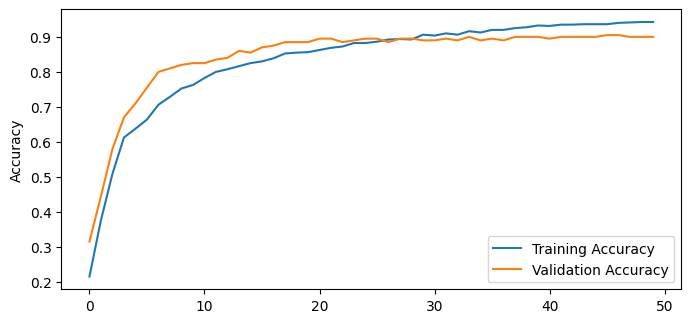

In [75]:
# evaluate model on test set
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))


# plot accuracy/error for training and validation
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
model.save('../modelh5/model_mfcc.h5')

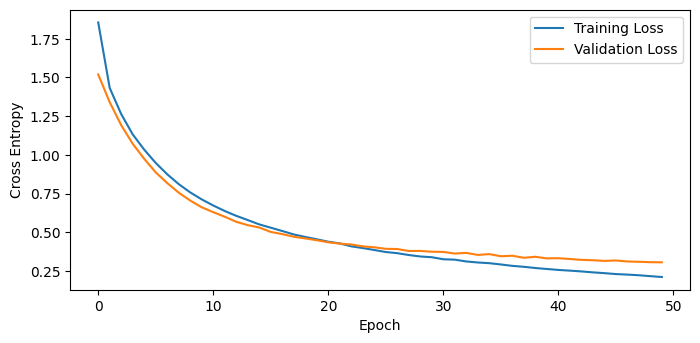

In [76]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.show()


In [77]:
# confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_p = np.argmax(y_pred, axis=1)
y_t = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_t, y_p)
cm

7/7 [==============================] - 0s 8ms/step


array([[42,  3,  1,  2,  0],
       [ 3, 27,  1,  2,  0],
       [ 0,  1, 37,  0,  0],
       [ 1,  6,  0, 37,  0],
       [ 0,  0,  0,  0, 37]])

In [78]:
# classification_report
from sklearn.metrics import classification_report

print(classification_report(y_t, y_p))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        48
           1       0.73      0.82      0.77        33
           2       0.95      0.97      0.96        38
           3       0.90      0.84      0.87        44
           4       1.00      1.00      1.00        37

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



### Testing

In [79]:
model_uri = '../modelh5/model_mfcc.h5'
new_model = tf.keras.models.load_model(model_uri)
new_model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 99, 64)            256       
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 50, 64)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 48, 32)            6176      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 24, 32)           0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 768)               0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [80]:
import wave
import json
header = 'filename'
for i in range(1, 41):
    header += f' mfcc{i}'
header += ' rms'
for i in range(1, 61):
  header += f' cqt{i}'
header += ' label'
header = header.split()


def extract_mfcc(audiofile):
    file = open('test.csv', 'w', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(header)
    y, sr = librosa.load(audiofile, mono=True, duration=3, sr=8000)
    coeffs = wavedec(y, 'db1', level=10)
    cA,cD10,cD9,cD8,cD7,cD6,cD5,cD4,cD3,cD2, cD1 = coeffs
    mfcc = librosa.feature.mfcc(y=cD1, sr=8000, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
    rms = librosa.feature.rms(y=cD1)[0]
    cqt = np.abs(librosa.cqt(y=cD1, sr=sr, n_bins=60)) 
    combined_features = np.concatenate((mfcc, rms.reshape(1, -1), cqt), axis=0)
    to_append = f'Signal'
    for e in combined_features:
        to_append += f' {np.mean(e.T, axis=0)}'
    file = open('test.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

def predict(audio):
    model = tf.keras.models.load_model(model_uri)
    extract_mfcc(audio)
    data = pd.read_csv('test.csv')
    scaler = StandardScaler()
    df = data.drop(['label', 'filename'], axis=1)
    pred = model.predict(df)
    class_labels = ['AS', 'MR', 'MS', 'MVP', 'N']
    cek = np.argmax(pred[0])
    print(pred[0])
    print(cek)
    print(f'Predicted class: {class_labels[cek]}')


In [81]:
predict('../data/training/MS/New_MS_003.wav')

1/1 [==============================] - 0s 120ms/step
[9.9862957e-01 3.0206220e-08 1.0902117e-03 2.8019652e-04 2.7594421e-14]
0
Predicted class: AS
